<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/K_Means_Algorithm_Implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data= make_blobs(n_samples=200,n_features=2,centers=4)

In [4]:
data[1]

array([0, 1, 3, 0, 1, 0, 0, 3, 2, 1, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 0, 2,
       1, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 3, 3,
       1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 0, 3, 3, 2, 3, 2, 1, 3, 0, 2,
       3, 1, 3, 0, 2, 1, 1, 1, 3, 1, 0, 2, 2, 0, 3, 0, 1, 3, 3, 3, 0, 3,
       1, 3, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 0, 3, 0, 2, 1, 3, 1, 0, 3, 3, 2, 1, 0, 1, 1, 2, 1, 0, 3, 2,
       0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3,
       2, 3, 3, 1, 1, 1, 2, 2, 2, 3, 0, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 2,
       1, 1, 2, 2, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0,
       0, 2])

In [5]:
data[0]

array([[ -7.81505017,  10.43104059],
       [  8.74018783,  -7.87978619],
       [ -8.78171674,   2.46953634],
       [ -6.61784907,   8.16236008],
       [  9.51584678,  -5.6603088 ],
       [ -7.40660163,   8.76484054],
       [ -6.36818164,   9.48809339],
       [ -8.49622495,   1.92276025],
       [ -9.86869828,   2.68239835],
       [  9.82927611,  -7.64025672],
       [ -9.68348177,   0.71902194],
       [ -6.25671718,   9.3185459 ],
       [ -9.77821493,   4.41445089],
       [ -6.34721245,   8.21291455],
       [ -8.38413572,   3.07452655],
       [ -7.88458455,   8.04111789],
       [ -6.9227997 ,   3.50625759],
       [-11.18779235,   2.66900524],
       [ -5.86820865,  10.09692261],
       [ 10.21113319,  -7.62391378],
       [ -7.68023682,  10.38505704],
       [ -7.45868922,   2.30936041],
       [  8.61987646,  -5.77126918],
       [-11.10959917,   2.00130193],
       [-10.09709044,   3.87579136],
       [ -8.17775599,  10.17889094],
       [ -7.00263794,   8.66926112],
 

In [6]:
data[0].shape

(200, 2)

In [7]:
data[1].shape

(200,)

# Visualise the Data


In [8]:
data[0][:,0] # all the rows in first column

array([ -7.81505017,   8.74018783,  -8.78171674,  -6.61784907,
         9.51584678,  -7.40660163,  -6.36818164,  -8.49622495,
        -9.86869828,   9.82927611,  -9.68348177,  -6.25671718,
        -9.77821493,  -6.34721245,  -8.38413572,  -7.88458455,
        -6.9227997 , -11.18779235,  -5.86820865,  10.21113319,
        -7.68023682,  -7.45868922,   8.61987646, -11.10959917,
       -10.09709044,  -8.17775599,  -7.00263794,  -8.65153062,
        10.47103038,  -8.32228709,  -6.66748516,  -7.20169624,
        -7.55801772,  -9.3372019 ,  10.17339131,  -9.38455109,
        -7.11982331,   8.96387958,  -7.65168196,   9.56743549,
        10.10729373, -10.33131155,  -9.07167388,  -8.2049381 ,
        10.7269257 , -10.15905587,  -7.65322731,  10.73762202,
         9.73251875,  10.23171573,  -5.97648317,  -4.83416007,
        -6.37862727,   9.38782622, -10.37751635,  -9.34421025,
        -5.88929923,  -9.55126151, -10.07071296,  -9.7320703 ,
        -8.97142885,  -9.55138651,  10.02196894,  -9.81

In [9]:
data[0][:,1] # all the rows in the second colum

array([10.43104059, -7.87978619,  2.46953634,  8.16236008, -5.6603088 ,
        8.76484054,  9.48809339,  1.92276025,  2.68239835, -7.64025672,
        0.71902194,  9.3185459 ,  4.41445089,  8.21291455,  3.07452655,
        8.04111789,  3.50625759,  2.66900524, 10.09692261, -7.62391378,
       10.38505704,  2.30936041, -5.77126918,  2.00130193,  3.87579136,
       10.17889094,  8.66926112,  1.73805911, -5.15835611,  9.55948806,
       10.1859964 ,  9.31210072,  9.90821007,  3.25115419, -5.77014175,
        1.86106044, 10.05981325, -7.81775831, 10.19979032, -6.02162339,
       -6.43020775,  2.68407083,  3.63523118,  1.39110596, -5.26138396,
        2.17022128,  8.98861798, -7.26001363, -7.43457157, -6.02734634,
       10.63275507, 10.73203164,  8.96300719, -7.42841957,  1.87232538,
        1.12296381,  9.61893914,  2.85919713,  0.34141607,  1.5443043 ,
        2.440389  ,  1.62699744, -7.0482595 ,  1.82235136,  9.62725911,
        1.88468133,  2.42886559, -7.11475912,  2.78378887,  7.93

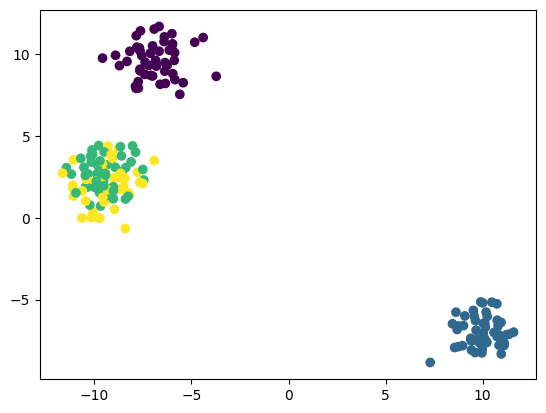

In [10]:
plt.scatter(data[0][:,0],data[0][:,1],c= data[1])

# Creating the clusters

In [11]:
from sklearn.cluster import KMeans

In [12]:
model= KMeans(n_clusters=4)

In [13]:
model.fit(data[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [14]:
model.cluster_centers_

array([[-9.0860171 ,  3.2138694 ],
       [ 9.94547001, -6.97107593],
       [-6.8962379 ,  9.64886032],
       [-9.76858788,  1.54209086]])

In [15]:
model.labels_ # predicted

array([2, 1, 0, 2, 1, 2, 2, 3, 0, 1, 3, 2, 0, 2, 0, 2, 0, 3, 2, 1, 2, 0,
       1, 3, 0, 2, 2, 3, 1, 2, 2, 2, 2, 0, 1, 3, 2, 1, 2, 1, 1, 3, 0, 3,
       1, 3, 2, 1, 1, 1, 2, 2, 2, 1, 3, 3, 2, 0, 3, 3, 0, 3, 1, 3, 2, 3,
       0, 1, 0, 2, 3, 1, 1, 1, 0, 1, 2, 0, 3, 2, 3, 2, 1, 3, 3, 3, 2, 0,
       1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 3, 0, 0, 0, 1, 1, 3, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 0, 1, 3, 1, 2, 3, 3, 0, 1, 2, 1, 1, 3, 1, 2, 0, 3,
       2, 0, 0, 3, 0, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 1, 0, 3,
       0, 3, 3, 1, 1, 1, 0, 0, 0, 3, 2, 3, 0, 0, 2, 3, 2, 0, 2, 2, 3, 0,
       1, 1, 0, 3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 1, 3, 2, 2,
       2, 3], dtype=int32)

In [16]:
 data[1] # orginal values

array([0, 1, 3, 0, 1, 0, 0, 3, 2, 1, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 0, 2,
       1, 3, 2, 0, 0, 3, 1, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 3, 3,
       1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 2, 3, 0, 3, 3, 2, 3, 2, 1, 3, 0, 2,
       3, 1, 3, 0, 2, 1, 1, 1, 3, 1, 0, 2, 2, 0, 3, 0, 1, 3, 3, 3, 0, 3,
       1, 3, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 0, 3, 0, 2, 1, 3, 1, 0, 3, 3, 2, 1, 0, 1, 1, 2, 1, 0, 3, 2,
       0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 1, 3, 3,
       2, 3, 3, 1, 1, 1, 2, 2, 2, 3, 0, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 2,
       1, 1, 2, 2, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0,
       0, 2])

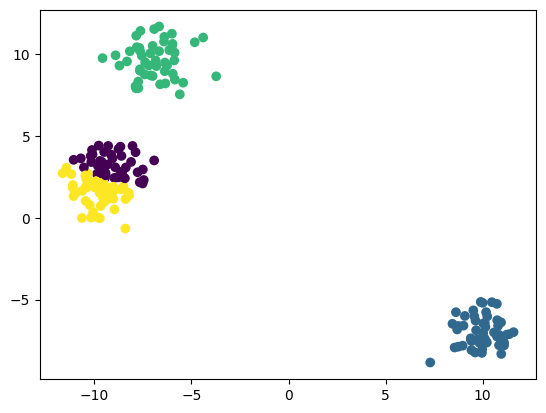

In [17]:
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_)

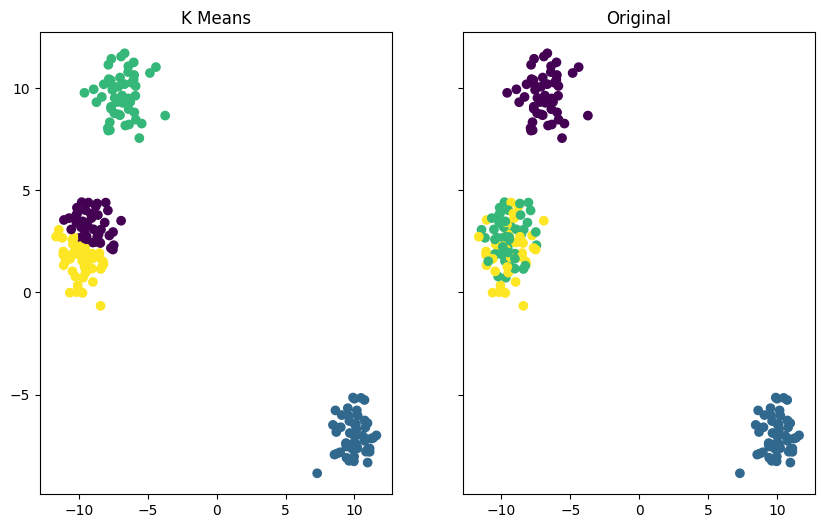

In [18]:

f, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize= (10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c = model.labels_ )
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c = data[1] )

# Elbow Method
* Helps to find optimal number of clusters for K means algo

In [19]:
Ks = 20 #maximum clusters you want to test
mse =  np.zeros((Ks-1))

for n in range(1, Ks):

  kcluster =  n

  kmeans = KMeans(n_clusters = kcluster, random_state = 0, n_init = 15).fit(data[0])

  mse[n-1] = kmeans.inertia_



**inertia_**:In k-means clustering, kmeans.inertia_ is an attribute that represents the sum of squared distances of samples to their closest cluster center. It's a measure of how well the clusters are formed. Lower inertia generally indicates tighter and more cohesive clusters.

You can use kmeans.inertia_ to:

Evaluate Clustering Performance: Compare the inertia values for different numbers of clusters (k) to find the optimal k using techniques like the elbow method.

Assess Cluster Quality: A lower inertia suggests better clustering, as points are closer to their assigned centers.

Remember that inertia alone might not be sufficient for evaluating clustering, and other metrics like silhouette score should also be considered.

In [23]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = 10).fit(data[0])
print(kmeans.inertia_)
print(mse)

327.42770459280064
[20479.40931919  2421.2767278    408.34878039   327.42770459
   287.06995136   248.98440046   219.88293359   192.37100742
   170.59023229   150.51023751   133.73706408   120.25620176
   112.11331888   104.76448034    98.26798023    91.09246337
    85.96369188    81.71796228    75.20586635]


Text(0.5, 1.0, 'K selection')

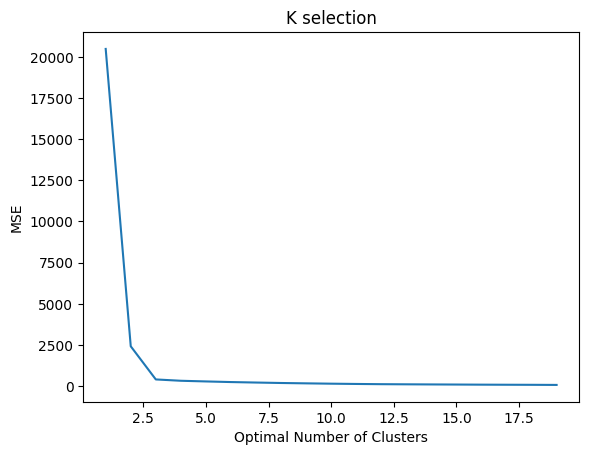

In [20]:
plt.plot(range(1,Ks), mse)
plt.xlabel('Optimal Number of Clusters')
plt.ylabel('MSE')
plt.title('K selection')